In [1]:
from redes import *
from fun_basicas import *
from scipy.optimize import minimize

In [7]:
X, Y, _ = cargarDatos()

Y = one_hot(Y, 4)

num_entradas = X.shape[1]
num_ocultas = 25
num_etiquetas = 4

INIT_EPSILON = 0.12

theta1 = np.random.random((num_ocultas,(num_entradas + 1)))*(2*INIT_EPSILON) - INIT_EPSILON
theta2 = np.random.random((num_etiquetas,(num_ocultas + 1)))*(2*INIT_EPSILON) - INIT_EPSILON

params_rn = np.concatenate((np.ravel(theta1), np.ravel(theta2)))

backprop (params_rn ,num_entradas ,num_ocultas , num_etiquetas , X, Y, 0.1)

(3.0020703370657924,
 array([-2.22756905e-03,  2.50945565e-03,  2.12037073e-03,  1.67702587e-03,
         1.80990223e-03, -1.29652637e-04, -2.87291823e-03,  4.52857917e-03,
        -1.37753935e-03,  8.93984202e-04,  1.30025986e-03,  2.28762343e-03,
         2.74816633e-03,  1.09243970e-03,  1.16728209e-03,  7.54215191e-03,
         3.33708437e-03,  2.81611557e-03,  1.42628491e-03,  8.33437612e-04,
         5.73824670e-04,  1.50466525e-03,  3.30963577e-03,  6.54244923e-03,
         7.71773379e-04,  3.16993941e-04,  1.90906796e-03,  1.75280757e-03,
         2.28777103e-03, -1.76853650e-03, -1.05500812e-03,  8.93123570e-04,
         1.43185606e-03, -4.72891102e-04,  1.08336776e-03,  1.85864971e-03,
         2.15870382e-03, -1.29942758e-03, -9.05662402e-04,  4.79593452e-03,
         1.19548205e-03,  1.75248680e-03,  1.32763983e-03,  1.16978980e-03,
         6.08080537e-04,  1.01160862e-03,  7.74547967e-04,  4.43227787e-03,
         1.23481527e-03,  3.72986033e-03,  9.66911252e-04,  2.06326

In [24]:
def prueba_neurona(X, y, theta1, theta2):
    """función que devuelve el porcentaje de acierto de una red neuronal utilizando unas matrices de pesos dadas"""
    n = len(y)

    y = np.ravel(y)

    _, _, result = forward_prop(X, theta1, theta2)

    result = np.argmax(result, axis=1)

    return (sum((result + 1)%4 == y) / n * 100)

24.524747388251413
33.944168522007196
43.260832334303814
49.974310669635216
53.22829251584176
56.396643260832334
57.95512930296284
24.524747388251413
33.96985785237198
44.930638808015075
50.29970885425586


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


52.80013700976195
55.00941942113376
58.85425586573043
24.524747388251413
35.442712793286525
43.7489296112348
49.91436889878404
53.41668093851687
56.94468230861449
59.27384826168864
24.524747388251413
36.119198492892615
40.392190443569106
40.392190443569106
47.49957184449392
53.168350744990576
57.32145915396472


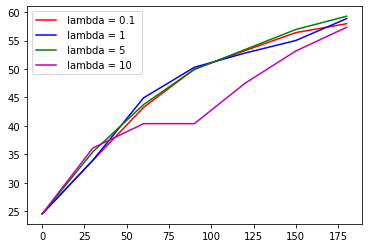

In [25]:
X, y, _ = cargarDatos()


y_onehot = one_hot(y, 4)


input_size = X.shape[1]
hidden_size = 25
num_labels = 4
iteraciones = np.arange(0,200,30)
lambdas = [0.1, 1 , 5, 10]
colores = ['r', 'b' , 'g', 'm']

INIT_EPSILON = 0.12

theta1 = np.random.random((hidden_size,(input_size + 1)))*(2*INIT_EPSILON) - INIT_EPSILON
theta2 = np.random.random((num_labels,(hidden_size + 1)))*(2*INIT_EPSILON) - INIT_EPSILON

params = np.concatenate((np.ravel(theta1), np.ravel(theta2)))

plt.figure()

i = 0

for reg in lambdas:
    percent = []
    for iters in iteraciones:
        fmin = minimize(fun=backprop, x0=params,
                args=(input_size, hidden_size,
                num_labels, X, y_onehot, reg),
                method='TNC', jac=True,
                options={'maxiter': iters})

        theta1 = np.reshape(fmin.x[:hidden_size*(input_size + 1)],(hidden_size,(input_size + 1)))
        theta2 = np.reshape(fmin.x[hidden_size * (input_size+1):],(num_labels,(hidden_size + 1)))

        p = prueba_neurona(X, y, theta1, theta2)
        print(p)
        percent.append(p)
    plt.plot(iteraciones, percent, c = colores[i] , label = ' lambda = {} '.format(reg))
    i = i+1
    
plt.legend()
plt.savefig('acierto_reg_iter.png')
plt.show()

In [26]:
def coste2(theta1, theta2, theta3, X, Y, num_etiquetas):  # Y preparada

    A1, A2, A3, h = forward_prop2(X, theta1, theta2, theta3)

    sum1 = Y * np.log(h)
    sum2 = (1 - Y) * np.log(1 - h + 1e-6)

    return (-1 / X.shape[0]) * np.sum(sum1 + sum2)


def coste_reg2(theta1, theta2, theta3, X, Y, num_etiquetas, Lambda):
    c = coste2(theta1, theta2, theta3, X, Y, num_etiquetas)
    m = X.shape[0]

    e = sum(sum(theta1[:, 1:] ** 2)) + sum(sum(theta2[:, 1:] ** 2)) + sum(sum(theta3[:, 1:] ** 2))

    return c + (Lambda / (2 * m)) * e


def forward_prop2(X, theta1, theta2, theta3):
    n = X.shape[0]

    # Se añade una fila de unos a la matriz inicial
    X = np.hstack([np.ones([n, 1]), X])

    # Las capas ocultas utilizan la primera y segunda matrices de pesos para crear sus neuronas y les añaden una fila de unos
    Oculta1 = sigmoide(np.dot(X, theta1.T))
    Oculta1 = np.hstack([np.ones([n, 1]), Oculta1])
    
    Oculta2 = sigmoide(np.dot(Oculta1, theta2.T))
    Oculta2 = np.hstack([np.ones([n, 1]), Oculta2])

    # El resultado se calcula pasando por la segunda matriz de pesos todas las neuronas de la capa oculta
    Resultado = sigmoide(np.dot(Oculta2, theta3.T))

    return X, Oculta1, Oculta2, Resultado




def gradiente2(theta1, theta2, theta3, X, y):
    # Creamos los Delta con la forma de theta pero inicializados a cero
    Delta1 = np.zeros(np.shape(theta1))
    Delta2 = np.zeros(np.shape(theta2))
    Delta3 = np.zeros(np.shape(theta3))

    m = len(y)

    # Se realiza la propagación hacia delante
    A1, A2, A3, h = forward_prop2(X, theta1, theta2, theta3)

    # Se realiza la propagación hacia atras para cada
    # elemento para comprobar el fallo
    for k in range(m):
        a1k = A1[k, :]
        a2k = A2[k, :]
        a3k = A3[k, :]
        a4k = h[k, :]
        yk = y[k, :]

        d4 = a4k - yk
        g_prima = (a3k * (1 - a3k))
        d3 = np.dot(theta3.T, d4) * g_prima
        
        g_prima = (a2k * (1 - a2k))
        d2 = np.dot(theta2.T, d3[1:]) * g_prima

        Delta1 = Delta1 + np.dot(d2[1:, np.newaxis], a1k[np.newaxis, :])
        Delta2 = Delta2 + np.dot(d3[1:, np.newaxis], a2k[np.newaxis, :])
        Delta3 = Delta3 + np.dot(d4[:, np.newaxis], a3k[np.newaxis, :])

    # Se devuelven los Deltas que corresponden al gradiente
    return Delta1 / m, Delta2 / m, Delta3 / m




def gradiente_reg2(theta1, theta2, theta3, X, y, Lambda):
    m = len(y)
    Delta1, Delta2, Delta3 = gradiente2(theta1, theta2, theta3, X, y)

    # A cada elemento del gradiente (menos la primera columna) se le añade el termino de regularización Lambda
    # multiplicado por cada elemento de las matriz theta 1 y theta2
    Delta1[:, 1:] = Delta1[:, 1:] + (Lambda / m) * theta1[:, 1:]
    Delta2[:, 1:] = Delta2[:, 1:] + (Lambda / m) * theta2[:, 1:]
    Delta3[:, 1:] = Delta3[:, 1:] + (Lambda / m) * theta3[:, 1:]

    return Delta1, Delta2, Delta3


def backprop2(params_rn, num_entradas, num_ocultas1, num_ocultas2, num_etiquetas, X, y, reg):
    # backprop pero con dos capas ocultas
    
    pos = (num_ocultas1 * (num_entradas + 1)) + (num_ocultas2 * (num_ocultas1 + 1))
    
    theta1 = np.reshape(params_rn[:num_ocultas1 * (num_entradas + 1)], (num_ocultas1, (num_entradas + 1)))
    theta2 = np.reshape(params_rn[num_ocultas1 * (num_entradas + 1): pos ], (num_ocultas2, (num_ocultas1 + 1)))
    theta3 = np.reshape(params_rn[pos :], (num_etiquetas, (num_ocultas2 + 1)))

    m = len(y)

    D1, D2, D3 = gradiente_reg2(theta1, theta2, theta3, X, y, reg)

    coste = coste_reg2(theta1, theta2, theta3, X, y, num_etiquetas, reg)

    gradiente = np.concatenate((np.ravel(D1), np.ravel(D2), np.ravel(D3)))

    return coste, gradiente



def prueba_neurona2(X, y, theta1, theta2, theta3):
    """función que devuelve el porcentaje de acierto de una red neuronal utilizando unas matrices de pesos dadas"""
    n = len(y)

    y = np.ravel(y)

    _, _, _, result = forward_prop2(X, theta1, theta2, theta3)

    result = np.argmax(result, axis=1)

    return (sum((result + 1)%4 == y) / n * 100)

In [6]:
import numpy as np
np.set_printoptions(threshold=np.inf)

X, y, _ = cargarDatos()


y_onehot = one_hot(y, 4)

input_size = X.shape[1]
hidden_size1 = 34
hidden_size2 = 17
num_labels = 4

INIT_EPSILON = 0.12

theta1 = np.random.random((hidden_size1,(input_size + 1)))*(2*INIT_EPSILON) - INIT_EPSILON
theta2 = np.random.random((hidden_size2,(hidden_size1 + 1)))*(2*INIT_EPSILON) - INIT_EPSILON
theta3 = np.random.random((num_labels,(hidden_size2 + 1)))*(2*INIT_EPSILON) - INIT_EPSILON

params = np.concatenate((np.ravel(theta1), np.ravel(theta2), np.ravel(theta3)))

backprop2(params, input_size ,hidden_size1 ,hidden_size2, num_labels , X, y_onehot, 0.1)

(2.912170464277998,
 array([-8.39876286e-05,  5.75467121e-06,  5.90320802e-05,  6.76395391e-05,
         6.88367763e-05,  6.88424526e-05,  2.00792723e-04,  2.56256249e-04,
         1.01091825e-04, -1.33685663e-05,  3.79124899e-05,  7.27245709e-05,
         6.41593175e-05, -5.00004173e-05, -2.74213595e-04,  4.92382832e-05,
         7.10248395e-05,  1.18407572e-04,  6.14196532e-05,  7.49482375e-05,
         6.56791684e-05,  4.73912070e-07,  1.30363145e-04,  1.29006207e-04,
         4.33082342e-05,  3.02728647e-05,  2.70399153e-05,  3.90441217e-05,
         3.47163214e-05, -9.47574279e-07, -1.19827902e-04,  8.29583056e-05,
         9.82802984e-05,  1.51870340e-04,  9.49096228e-05,  6.51516385e-05,
         4.05131141e-05, -4.43011921e-05, -1.00712783e-04,  9.94812563e-05,
         6.49219464e-05,  1.96436834e-04,  7.95180894e-05,  6.76853417e-05,
         5.80914965e-05, -3.40494039e-05,  1.24557250e-04,  1.00552005e-04,
         1.09585669e-04, -3.14584830e-05,  5.72189951e-05,  6.094220

48.40726151738311
51.18170919678027
53.767768453502306
53.767768453502306
53.767768453502306


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


47.97910601130331
52.36341839356054
52.36341839356054
52.36341839356054
54.40143860250043


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


45.812639150539475
51.25021407775304
55.66021579037507
59.3851686932694
62.442199006679225
46.69463949306388
50.41959239595821
53.81914711423189
57.49272135639665
59.539304675458126


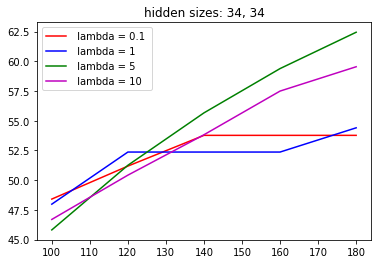

D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


38.131529371467714
44.36547353998972
47.72221270765542
53.48518581948964
55.71159445110464


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


50.52234971741737
54.889535879431406
57.08169207056003
60.17297482445624
62.22812125363932
45.727008049323516
50.17982531255352
53.168350744990576
56.67066278472341
59.39373180339099
45.127590340811786
49.67460181537934
53.26254495632814
55.42044870697037
57.23582805274876


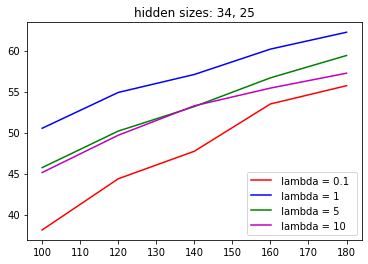

D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


51.81537934577839
55.71159445110464
58.57167323171776
60.67819832163042
62.59633498886795


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


44.26271621853057
51.87532111662956
57.50984757663984
60.121596163726664
62.142490152423356


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


36.77855797225552
37.857509847576644
42.592909744819316
48.766912142490156
53.29679739681452


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


47.045727008049326
51.41291317006337
54.94947765028259
57.98081863332762
59.530741565336534


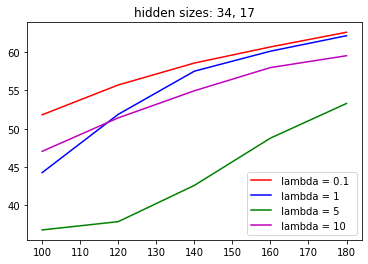

D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


32.32574070902552
40.50351087514986
45.67562938859393
49.99143688987841
54.29868128104127


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


50.59085459839013
56.07124507621168
60.11303305360507
63.178626477136504
64.82274362048295


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


37.9431409487926
47.773591368385
52.52611748587087
57.83524576126049
59.88182908032197


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


51.378660729576985
56.55077924302107
57.56122623736941
57.56122623736941
57.56122623736941


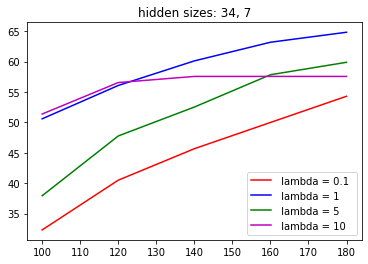

D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


37.0611406062682
42.04487069703716
45.932522692241825
48.31306730604555
51.48998116115773
41.685220071930125
43.13238568247988
47.448193183764346
52.2349717417366


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


56.31101215961637


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


41.21424901524234
43.5262887480733
47.79928069874978
51.3272820688474
52.65456413769481


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


42.94399725980476
46.48056174002398
48.99811611577325
52.47473882514129
55.42044870697037


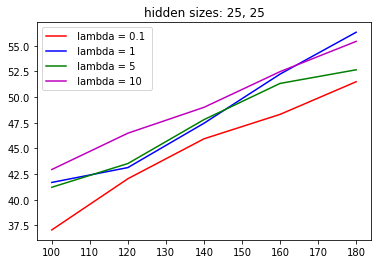

47.45675629388594


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


50.65079636924131
55.206370953930474
57.83524576126049
59.85613974995718


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


47.88491179996575
50.72786436033567
53.502312039732836
54.58982702517554
57.227264942627166
42.04487069703716
48.31306730604555


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


53.53656448021922
56.0284295256037
57.68110977907176
44.82788148655592
47.49100873437232
55.06079808186334
58.117828395273165
59.99314951190272


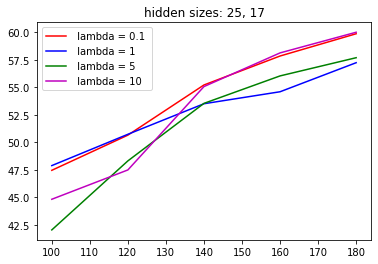

D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


44.27127932865217
51.1217674259291
53.87908888508306
54.992293200890565
56.26819660900839


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


49.08374721698921
54.4442541531084
56.03699263572529
58.528857681109784
59.70200376776845
43.86881315293715
43.86881315293715


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


46.009590683336185
56.76485699606096
60.65250899126563
50.77924302106525
54.55557458468916
57.295769823599926
60.138722383969856
61.132043158075014


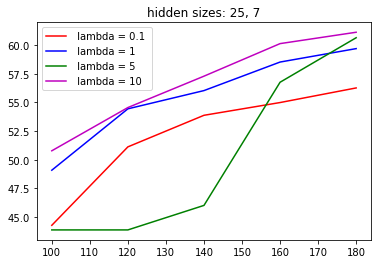

D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


46.6518239424559
48.338756636410345
48.338756636410345
48.338756636410345
51.29302962836102


D:\UNI\3ºAño\Notebook\Proyecto AA\fun_basicas.py:4: RuntimeWarning: overflow encountered in exp
  sigmoide = 1 / (1 + np.exp(-Z))


47.242678540846036
52.30347662270937


In [ ]:
X, y, _ = cargarDatos()


y_onehot = one_hot(y, 4)

input_size = X.shape[1]
#hidden_size1 = 34
#hidden_size2 = 17
num_labels = 4
iteraciones = np.arange(100,200,20)
hiddens = [34, 25, 17, 7]
lambdas = [0.1, 1 , 5, 10]
colores = ['r', 'b' , 'g', 'm']
INIT_EPSILON = 0.12




for hidden_size1 in hiddens:
    
    for hidden_size2 in hiddens:
        
        if hidden_size1 >= hidden_size2:

            theta1 = np.random.random((hidden_size1,(input_size + 1)))*(2*INIT_EPSILON) - INIT_EPSILON
            theta2 = np.random.random((hidden_size2,(hidden_size1 + 1)))*(2*INIT_EPSILON) - INIT_EPSILON
            theta3 = np.random.random((num_labels,(hidden_size2 + 1)))*(2*INIT_EPSILON) - INIT_EPSILON

            params = np.concatenate((np.ravel(theta1), np.ravel(theta2), np.ravel(theta3)))

            plt.figure()

            i = 0

            for reg in lambdas:

                percent = []

                for iters in iteraciones:

                    fmin = minimize(fun=backprop2, x0=params,
                            args=(input_size, hidden_size1, hidden_size2,
                            num_labels, X, y_onehot, reg),
                            method='TNC', jac=True,
                            options={'maxiter': iters})

                    pos = (hidden_size1 * (input_size + 1)) + (hidden_size2 * (hidden_size1 + 1))

                    theta1 = np.reshape(fmin.x[:hidden_size1 * (input_size + 1)], (hidden_size1, (input_size + 1)))
                    theta2 = np.reshape(fmin.x[hidden_size1 * (input_size + 1): pos ], (hidden_size2, (hidden_size1 + 1)))
                    theta3 = np.reshape(fmin.x[pos :], (num_labels, (hidden_size2 + 1)))

                    p = prueba_neurona2(X, y, theta1, theta2, theta3)
                    print(p)
                    percent.append(p)

                plt.plot(iteraciones, percent, c = colores[i] , label = ' lambda = {} '.format(reg))
                i = i+1
            plt.title("hidden sizes: {}, {}".format(hidden_size1, hidden_size2))
            plt.legend()
            plt.show()

Esta configuracion no es la mejor de red neuronal pero funciona todo con los datos